In [48]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [4]:
data=pd.read_csv("mock_kaggle[1].csv")

In [5]:
data.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [6]:
data.tail()

,data,venda,estoque,preco
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39
936,2016-07-31,183,3642,2.39


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     937 non-null    object 
 1   venda    937 non-null    int64  
 2   estoque  937 non-null    int64  
 3   preco    937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB


In [8]:
#rename columns from Portugese to English

data = data.rename(columns = { 'data' : 'Date',
                              'venda': 'Sales', 
                              'estoque': 'Stock', 
                              'preco': 'Price'})

In [10]:
data.head()

,Date,Sales,Stock,Price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [11]:
data.isnull().sum() # finding missing values

Date     0
Sales    0
Stock    0
Price    0
dtype: int64

In [12]:
#to convert string format to date format

data['Date'] = pd.to_datetime(data['Date'])

In [13]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Revenue'] = data['Sales'] * data['Price']

In [14]:
data.tail()

,Date,Sales,Stock,Price,Day,Month,Year,Revenue
932,2016-07-27,98,3179,2.39,27,7,2016,234.22
933,2016-07-28,108,3071,2.39,28,7,2016,258.12
934,2016-07-29,128,4095,2.39,29,7,2016,305.92
935,2016-07-30,270,3825,2.39,30,7,2016,645.30
936,2016-07-31,183,3642,2.39,31,7,2016,437.37


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     937 non-null    datetime64[ns]
 1   Sales    937 non-null    int64         
 2   Stock    937 non-null    int64         
 3   Price    937 non-null    float64       
 4   Day      937 non-null    int32         
 5   Month    937 non-null    int32         
 6   Year     937 non-null    int32         
 7   Revenue  937 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2)
memory usage: 47.7 KB


In [16]:
data.isnull().sum()

Date       0
Sales      0
Stock      0
Price      0
Day        0
Month      0
Year       0
Revenue    0
dtype: int64

In [17]:
data.set_index('Date' , inplace = True )

<Axes: xlabel='Date'>

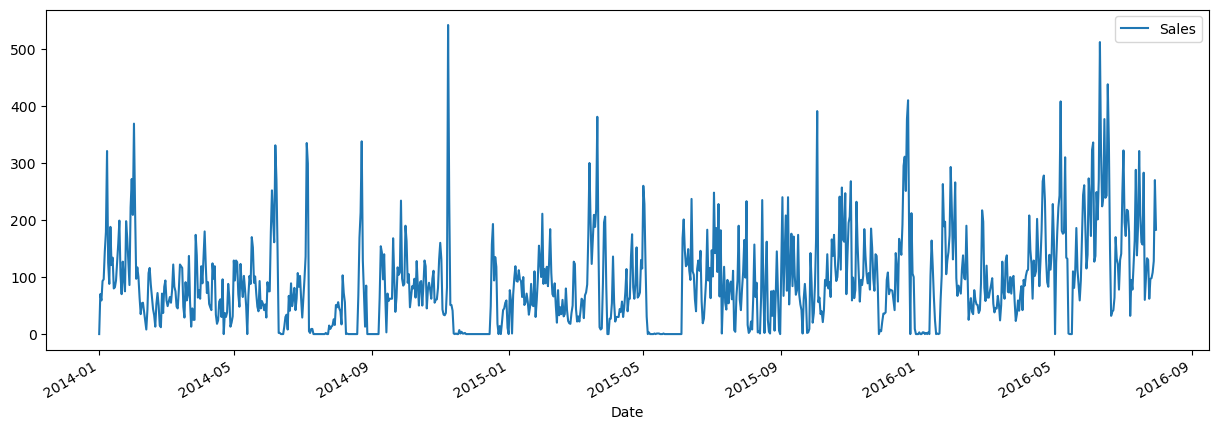

In [21]:
#visualisation of our target variable 
data['Sales'].plot(figsize = (15 , 5 ) ,legend = True )

<Axes: xlabel='Date'>

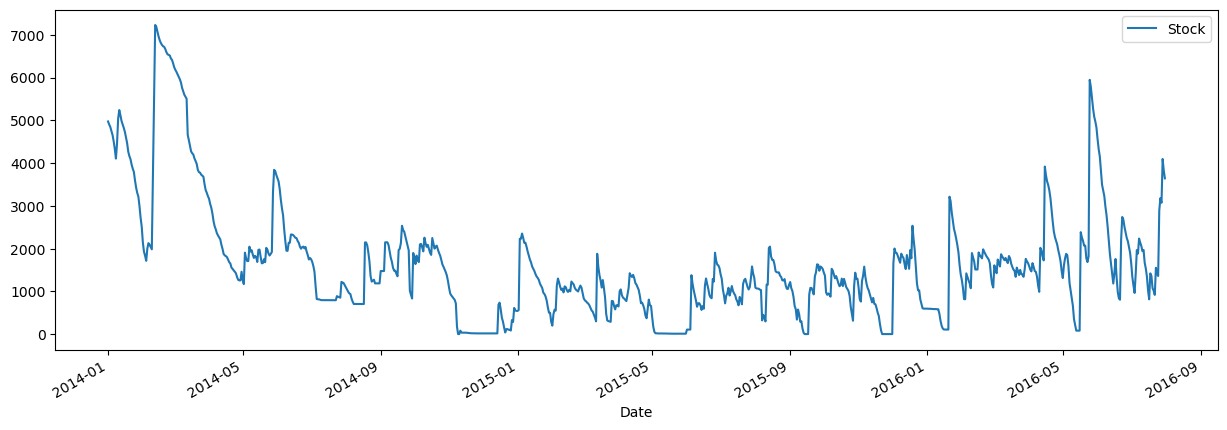

In [22]:
#visualisation of our other variable 
data['Stock'].plot(figsize = (15 , 5 ) ,legend = True )

<Axes: xlabel='Date'>

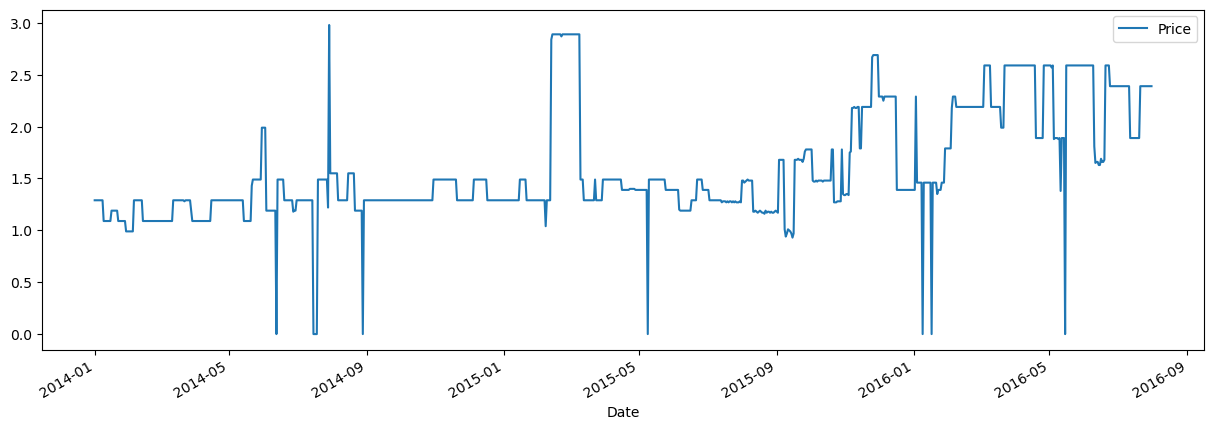

In [23]:
data['Price'].plot(figsize = (15 , 5 ) ,legend = True )

<Axes: xlabel='Date'>

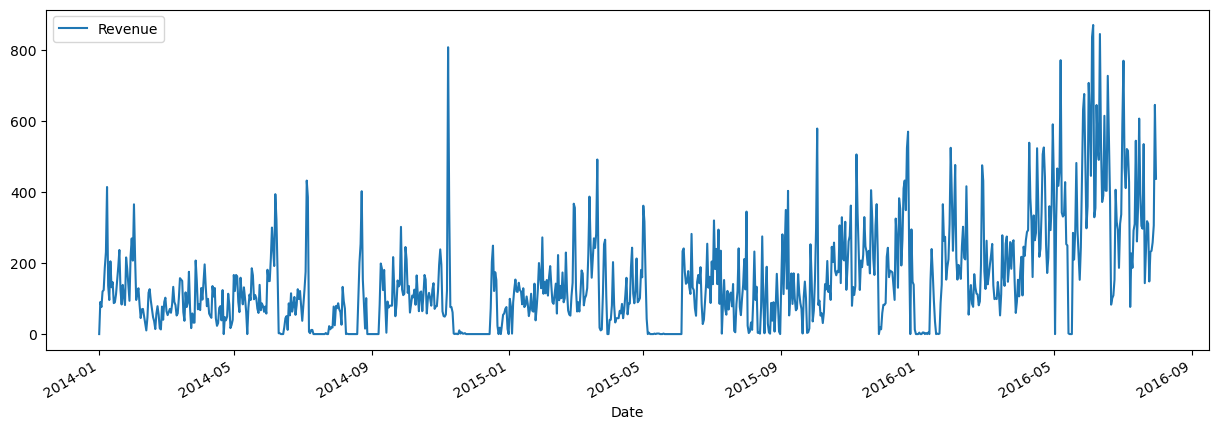

In [24]:
data['Revenue'].plot(figsize = (15 , 5 ) ,legend = True )

In [26]:
#Let's plot acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

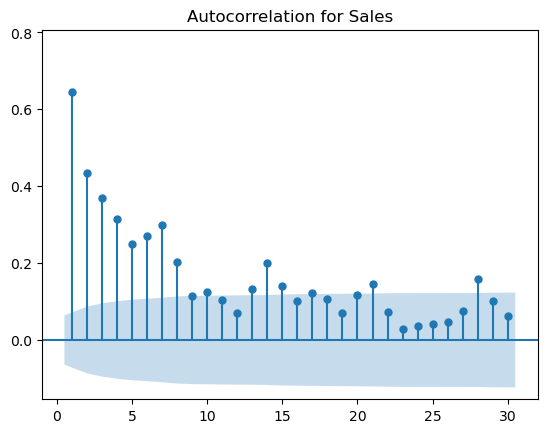

In [28]:
plot_acf(data['Sales'], lags = 30, title='Autocorrelation for Sales', zero=False, auto_ylims=True)
plt.show()

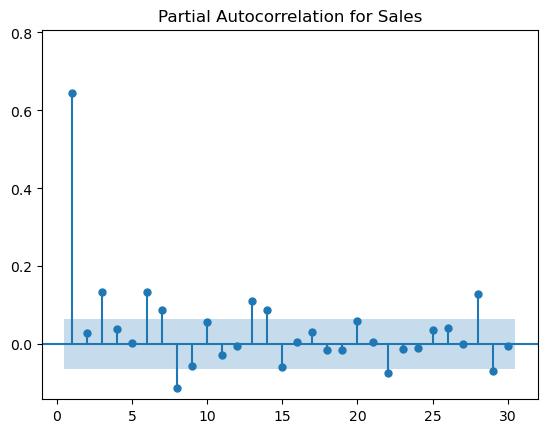

In [29]:
plot_pacf(data['Sales'], lags = 30, title='Partial Autocorrelation for Sales', zero=False, auto_ylims=True)
plt.show()

In [30]:
#Hence , acf plot shows 10 lags while pacf plot shows only 1 lag

In [31]:
#check stationarity in the data
import statsmodels.tsa.stattools as sts

In [32]:
sts.adfuller(data['Sales'])

(-5.326902281189408,
 4.815089201365693e-06,
 14,
 922,
 {'1%': -3.437462363899248,
  '5%': -2.8646798473884134,
  '10%': -2.568441851017076},
 10080.058794702525)

In [33]:
#Hence it shows that sales is stationary (p-value<0.05). but it has some seasonality

In [34]:
sts.adfuller(data['Stock'])

(-4.432775258132059,
 0.00025960098178191767,
 1,
 935,
 {'1%': -3.437363201927513,
  '5%': -2.864636122077874,
  '10%': -2.5684185607252137},
 13320.64266001144)

In [35]:
sts.adfuller(data['Price'])

(-4.585437174184153,
 0.0001373928567642458,
 2,
 934,
 {'1%': -3.4373707314972766,
  '5%': -2.8646394422797337,
  '10%': -2.5684203292233905},
 -90.17618431524147)

In [36]:
sts.adfuller(data['Revenue'])

(-2.913208654377513,
 0.043833430309160634,
 21,
 915,
 {'1%': -3.437516929214992,
  '5%': -2.86470390726455,
  '10%': -2.5684546666069457},
 10894.08755939725)

In [37]:
#To check seasonality in detail. Let's try Seasonal decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose

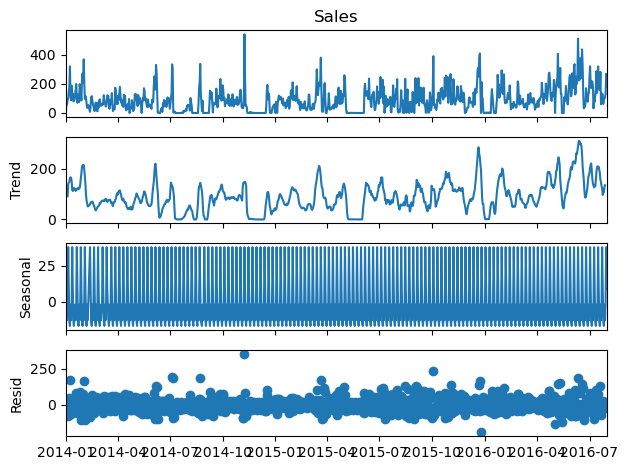

In [39]:
sd_sales = seasonal_decompose(data['Sales'] , model='additive' , period=7)
sd_sales.plot()
plt.show()

<Axes: xlabel='Date'>

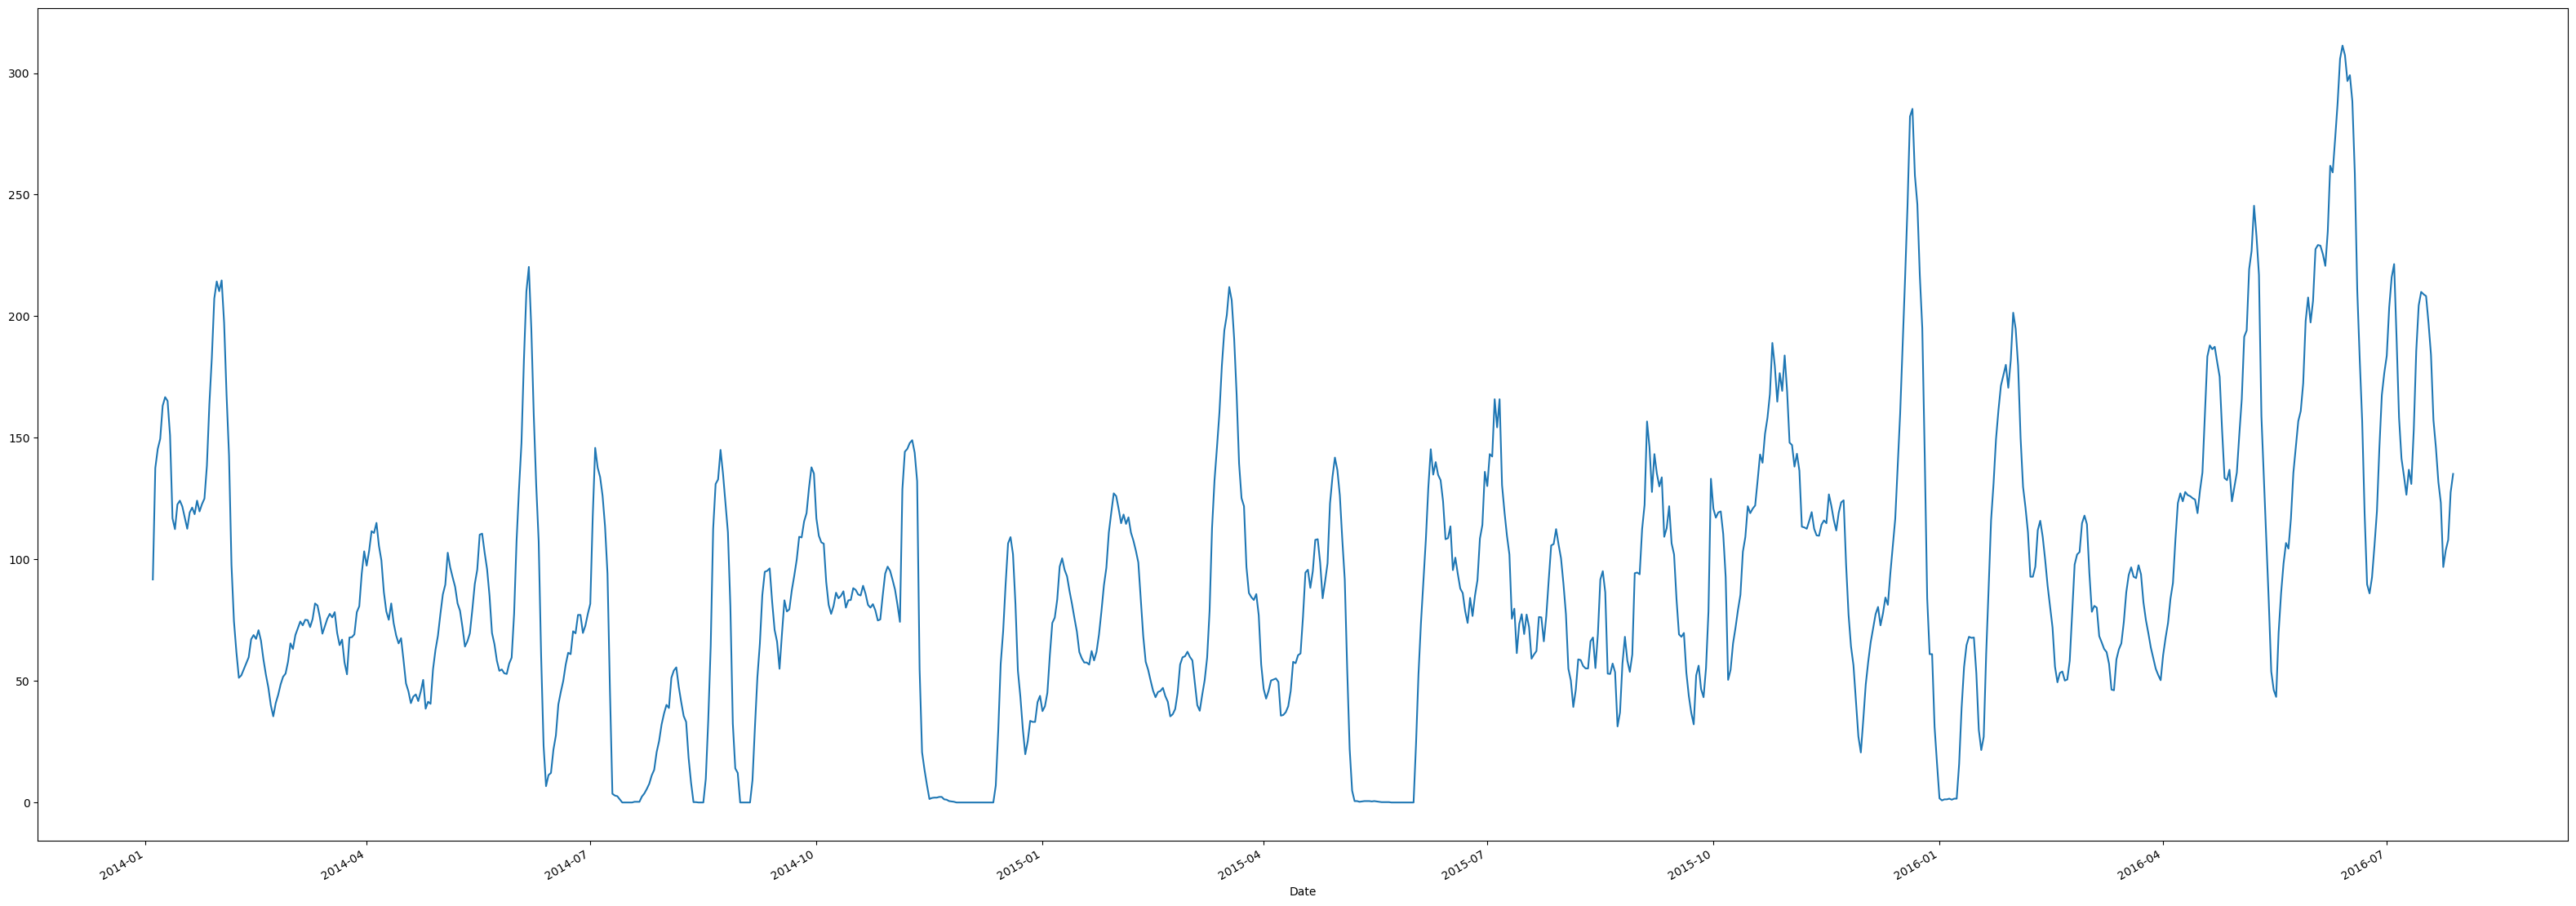

In [40]:
sd_sales.trend.plot(figsize = (40,15))

<Axes: xlabel='Date'>

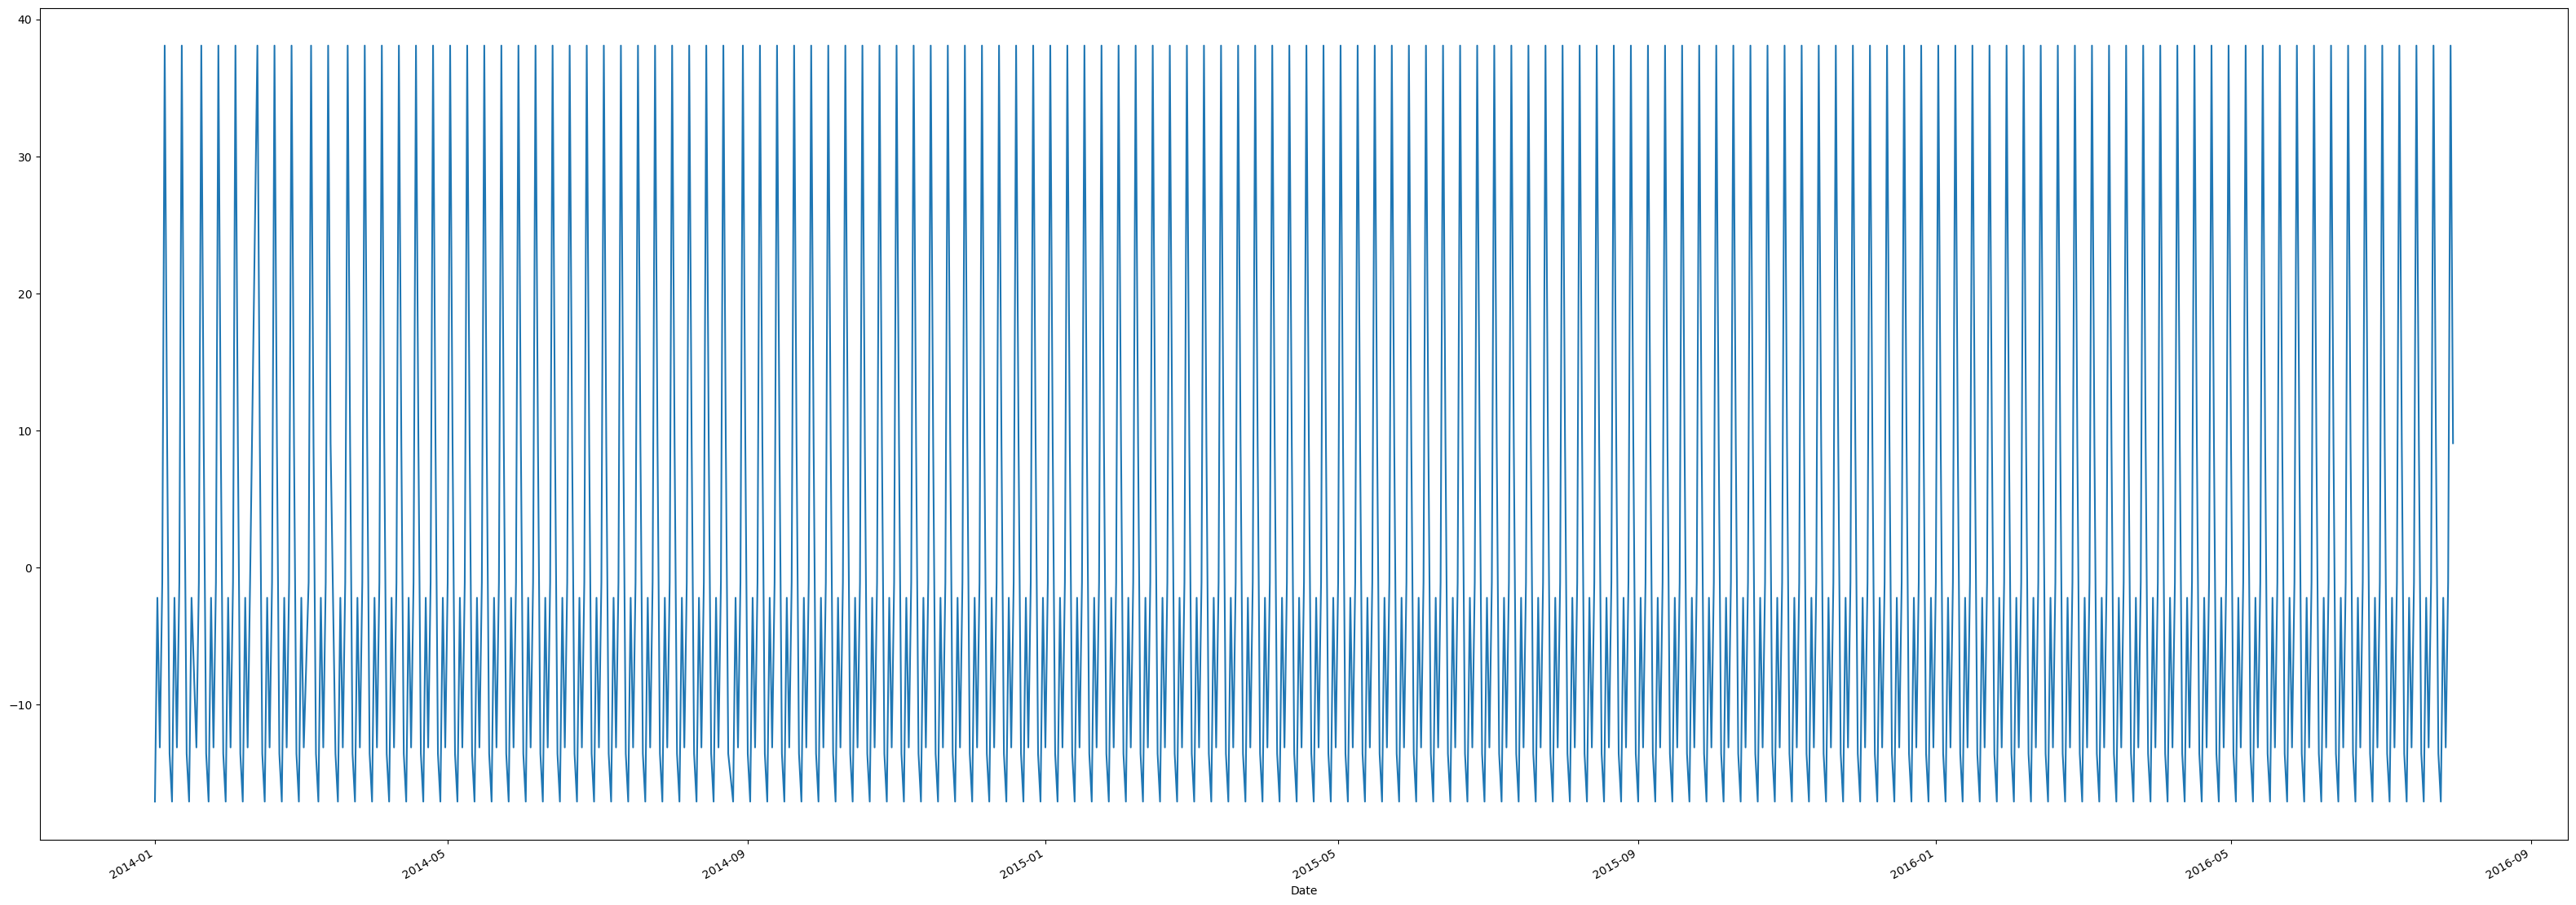

In [41]:
sd_sales.seasonal.plot(figsize = (40,15))

<Axes: xlabel='Date'>

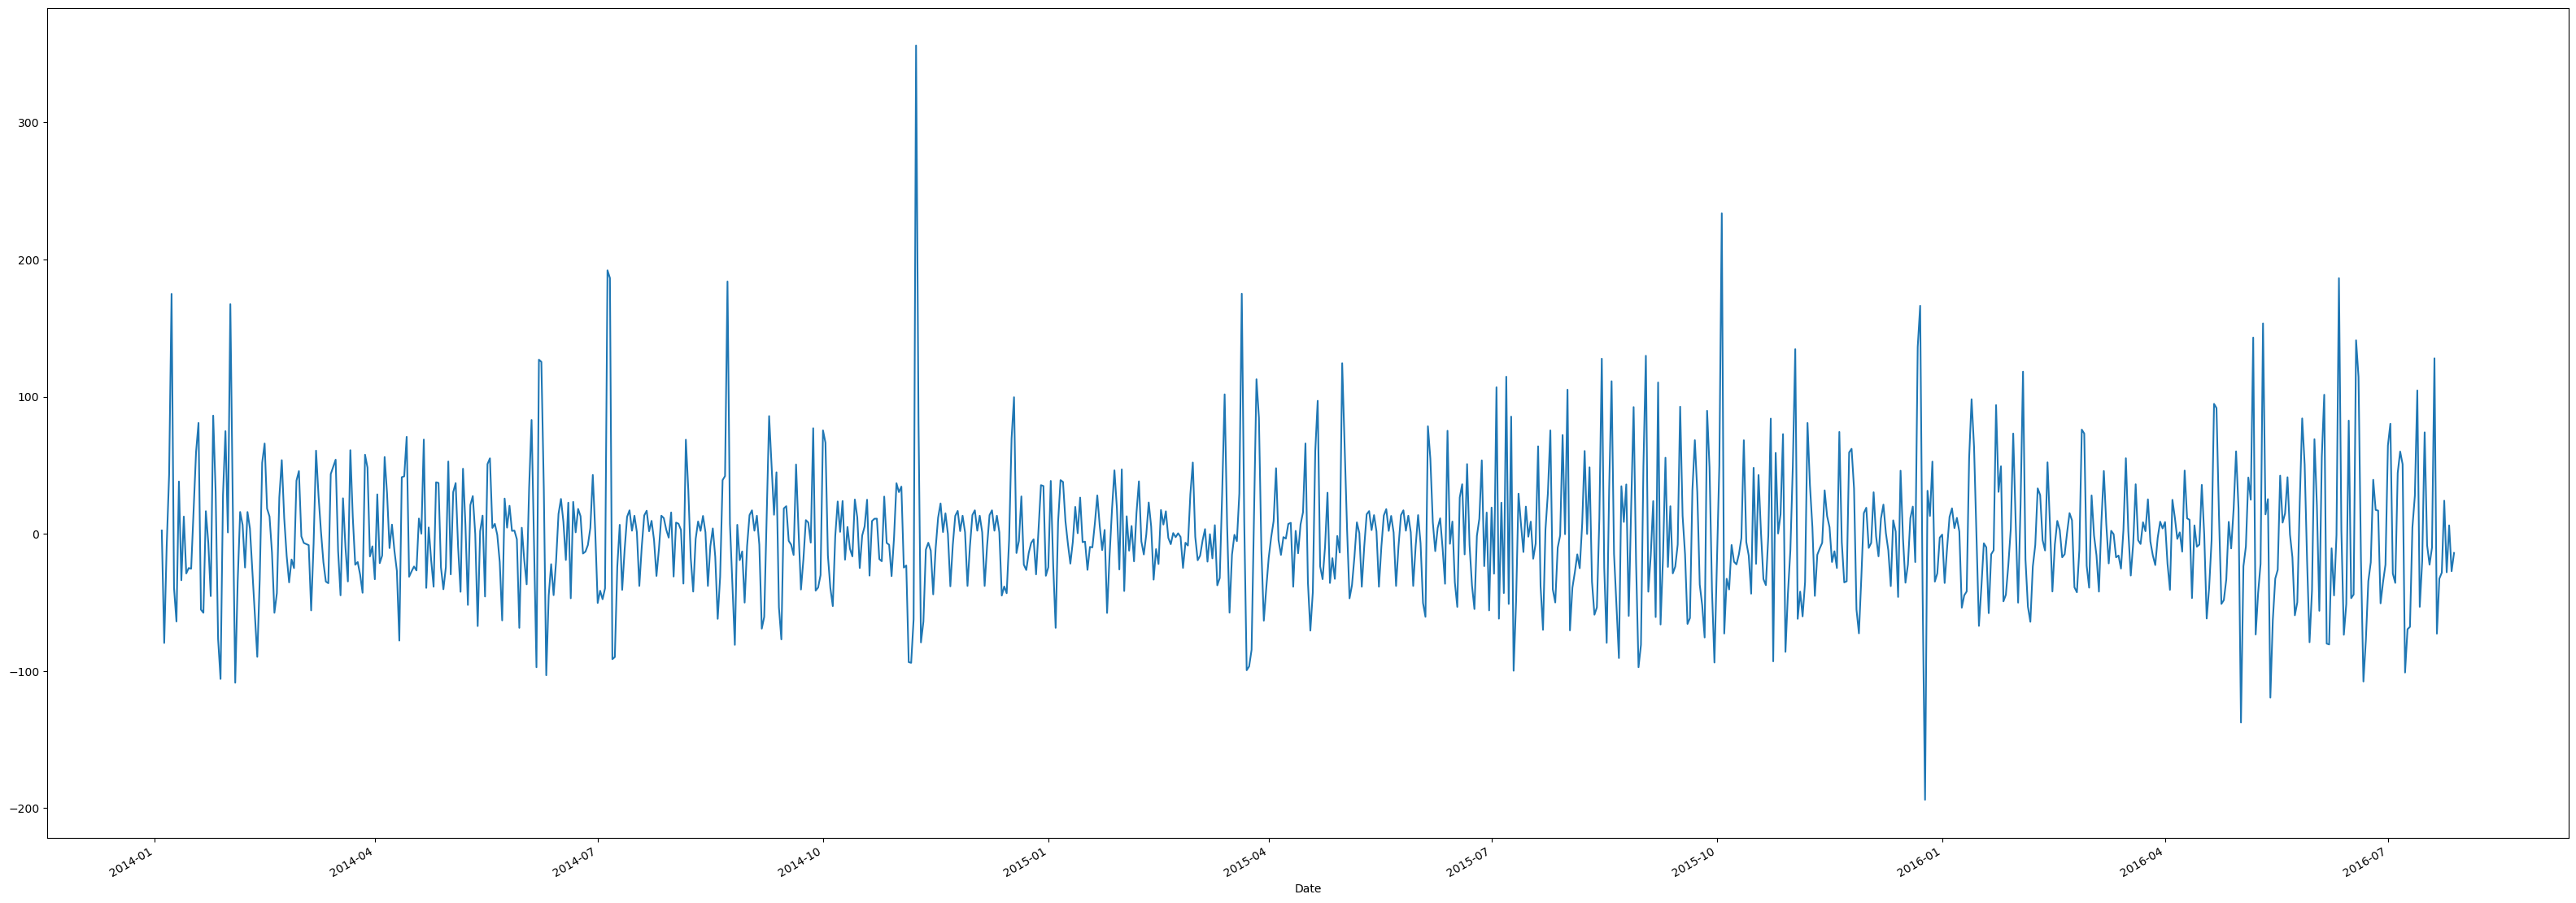

In [42]:
sd_sales.resid.plot(figsize = (40,15))

In [43]:
#We can see that there is seasonality but no trend.

In [44]:
#Now , let's check correlation 
data[['Sales', 'Stock', 'Price']].corr()

,Sales,Stock,Price
Sales,1.000000,0.153659,0.094779
Stock,0.153659,1.000000,-0.032604
Price,0.094779,-0.032604,1.000000


In [50]:
from statsmodels.tsa.stattools import adfuller

In [51]:
# Seasonal differencing
data['Sales_Seasonal_Diff'] = data['Sales'] - data['Sales'].shift(periods=12)
data = data.dropna()
# Check stationarity
result = adfuller(data['Sales_Seasonal_Diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -9.168095
p-value: 0.000000


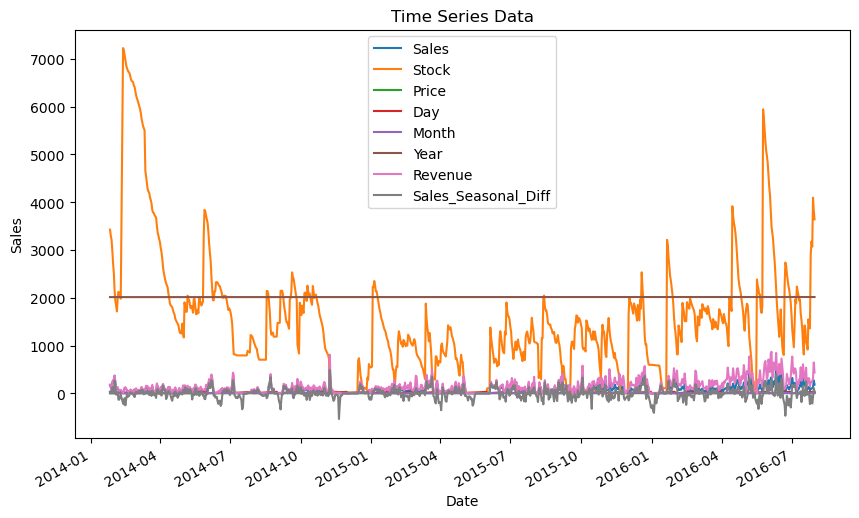

In [64]:
data.plot(figsize=(10, 6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

                                SARIMAX Results                                
Dep. Variable:     Sales_Seasonal_Diff   No. Observations:                  913
Model:                  ARIMA(1, 0, 1)   Log Likelihood               -5400.244
Date:                 Mon, 05 Aug 2024   AIC                          10808.489
Time:                         19:45:37   BIC                          10827.756
Sample:                              0   HQIC                         10815.844
                                 - 913                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2582      6.433      0.040      0.968     -12.350      12.867
ar.L1          0.4484      0.046      9.835      0.000       0.359       0.538
ma.L1          0.1862      0.054      3.479 

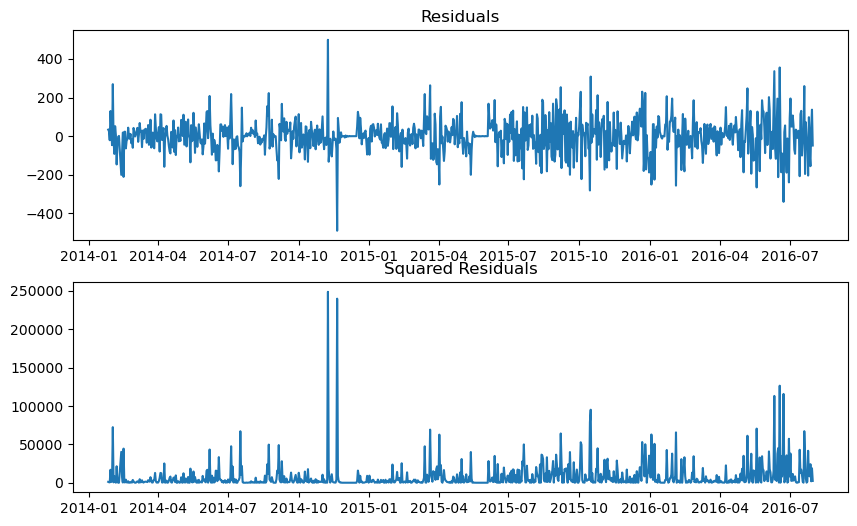

In [52]:
model = ARIMA(data['Sales_Seasonal_Diff'], order=(1, 0, 1))  # Adjust p, d, q as needed
model_fit = model.fit()
print(model_fit.summary())

# Plot residuals to ensure that they are white  noise.
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
plt.plot(np.square(residuals))
plt.title('Squared Residuals')
plt.show()

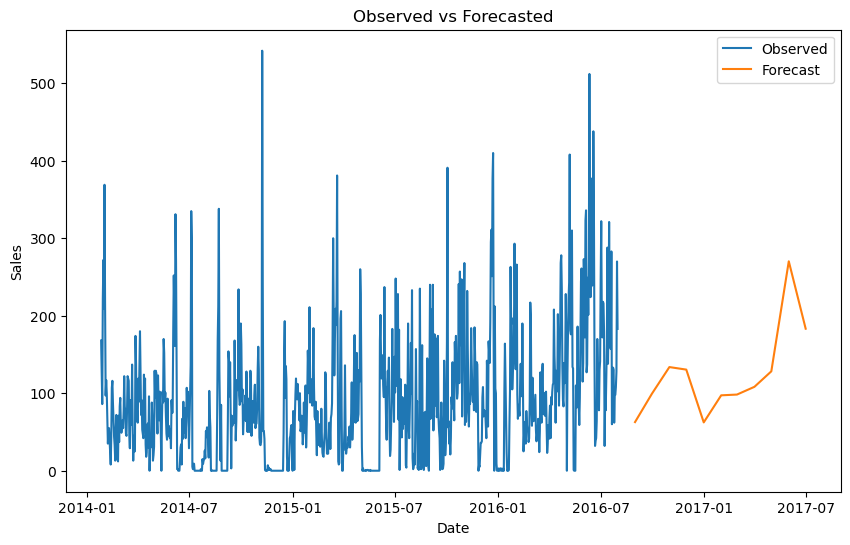

In [61]:
# Forecast future values
forecast_steps = 11
forecast = model_fit.forecast(steps=forecast_steps)

# Invert the differencing;
last_seasonal_values = data['Sales'][-11:]
forecast_series = forecast + last_seasonal_values.values

# Create a date range for the forecast
forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods = forecast_steps, freq = 'M')

# Let's Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], label='Observed')
plt.plot(forecast_dates, forecast_series, label='Forecast')
plt.title('Observed vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()